## 2.4 Mutable Data
### 2.4.1 The Object Metaphor

In [5]:
from datetime import date
tues = date(2014, 5, 13)
print(date(2014, 5, 19) - tues)

# Objects have attributes, which are named values that are part of the object.
print(tues.year)

# Objects also have methods, which are function-valued attributes.
tues.strftime('%A, %B %d')

6 days, 0:00:00
2014


'Tuesday, May 13'

Dates are objects, but numbers, strings, lists, and ranges are all objects as well. They represent values, but also behave in a manner that befits the values they represent. They also have attributes and methods. For instance, strings have an array of methods that facilitate text processing.

In [7]:
print('1234'.isnumeric())
print('rOBERT dE nIRO'.swapcase())
print('eyes'.upper().endswith('YES'))

# In fact, all values in Python are objects. 
# That is, all values have behavior and attributes. They act like the values they represent.

True
Robert De Niro
True


### 2.4.2 Sequence Objects

In [18]:
chinese = ['coin', 'string', 'myriad']
suits = chinese

suits.pop() # Remove and return the final element
suits.remove('string') #Remove the first element that eaquals the argument

suits.append('cup') # Add an element to the end
suits.extend(['sword', 'club']) #Add all elements of a sequence to the end

suits[2] = 'spade' # Replace an element

suits[0:2] = ['heart', 'diamond'] # Replace a slice

# Methods also exist for inserting, sorting, and reversing lists. 
# All of these mutation operations change the value of the list; 
# they do not create new list objects.


#### Sharing and Identity

In [20]:
# Sharing and Identity
print(chinese)
print(suits)

# Lists can be copied using the list constructor function. 
# Changes to one list do not affect another, unless they share structure.
nest = list(suits)
nest[0] = suits
suits.insert(2, 'Joker') # Insert an element at index 2, shifting the rest
print(nest)

# And likewise, undoing this change in the first element of nest will change suit as well.
nest[0].pop(2)
print(nest)

# Because two lists may have the same contents but in fact be different lists, 
# we require a means to test whether two objects are the same
print(suits is nest[0])
print(suits is ['heart', 'diamond', 'spade', 'club'])
print(suits == ['heart', 'diamond', 'spade', 'club'])
# The final two comparisons illustrate the difference between is and ==. 
# The former checks for identity, while the latter checks for the equality of contents.

['heart', 'diamond', 'spade', 'club']
['heart', 'diamond', 'spade', 'club']
[['heart', 'diamond', 'Joker', 'spade', 'club'], 'diamond', 'spade', 'club']
[['heart', 'diamond', 'spade', 'club'], 'diamond', 'spade', 'club']
True
False
True


#### List comprehensions
A list comprehension always creates a new list. For example, the unicodedata module tracks the official names of every character in the Unicode alphabet.

In [22]:
from unicodedata import lookup
[lookup('WHITE ' + s.upper() + ' SUIT') for s in suits]

['♡', '♢', '♤', '♧']

#### Tuples
A tuple, an instance of the built-in tuple type, is an immutable sequence. Tuples are created using a tuple literal that separates element expressions by commas. Parentheses are optional but used commonly in practice. Any objects can be placed within tuples.

In [29]:
1, 2 + 3
("the", 1, ("and", "only"))
(10,)

code = ("up", "up", "down", "down") + ("left", "right") * 2
len(code)
print(code[3])
code.count("down")
code.index("left")

However, the methods for manipulating the contents of a list are not available for tuples because tuples are immutable.

While it is not possible to change which elements are in a tuple, it is possible to change the value of a mutable element contained within a tuple.

In [30]:
nest = (10, 20, [30, 40])
nest[2].pop()

40

Tuples are used implicitly in multiple assignment. An assignment of two values to two names creates a two-element tuple and then unpacks it.

### 2.4.3 Dictionaries

In [34]:
numerals = {'I': 1.0, 'V': 5, 'X': 10}
print(numerals['X'])
numerals['I'] = 1
numerals['L'] = 50
print(numerals) # Dictionaries are unordered collections of key-value pairs.

print(sum(numerals.values()))
dict([(3, 9), (4, 16), (5, 25)]) # A list of key-value pairs can be converted into a dictionary by calling the dict constructor function.


10
{'I': 1, 'V': 5, 'X': 10, 'L': 50}
66


{3: 9, 4: 16, 5: 25}

Dictionaries do have some restrictions:

- A key of a dictionary cannot be or contain a mutable value.
- There can be at most one value for a given key.

Tuples are commonly used for keys in dictionaries because lists cannot be used.

In [37]:
numerals.get('A', 0) # default value
numerals.get('V', 0)

5

Dictionaries also have a comprehension syntax analogous to those of lists. A key expression and a value expression are separated by a colon. Evaluating a dictionary comprehension creates a new dictionary object.

In [38]:
{x: x*x for x in range(3,6)}

{3: 9, 4: 16, 5: 25}

### 2.4.4 Local State
```
>>> withdraw(25)
75
>>> withdraw(25)
50
>>> withdraw(60)
'Insufficient funds'
```
Above, the expression withdraw(25), evaluated twice, yields different values. Thus, this user-defined function is non-pure. Calling the function not only returns a value, but also has the side effect of changing the function in some way, so that the next call with the same argument will return a different result. This side effect is a result of withdraw making a change to a name-value binding outside of the current frame.

For withdraw to make sense, it must be created with an initial account balance. The function make_withdraw is a higher-order function that takes a starting balance as an argument. The function withdraw is its return value.

```
withdraw = make_withdraw(100)
```

In [ ]:
def make_withdraw(balance):
    """Return a withdraw fuction that draws down balance with each call."""
    def withdraw(amount):
        nonlocal balance     # Declare the name "balance" nonlocal
        if amount > balance:
            return 'Insufficient funds'
        balance = balance - amount
        return balance
    return withdraw

The nonlocal statement declares that whenever we change the binding of the name balance, the binding is changed in the first frame in which balance is already bound. Recall that without the nonlocal statement, an assignment statement would always bind a name in the first frame of the current environment. 

The nonlocal statement indicates that the name appears somewhere in the environment other than the first (local) frame or the last (global) frame.
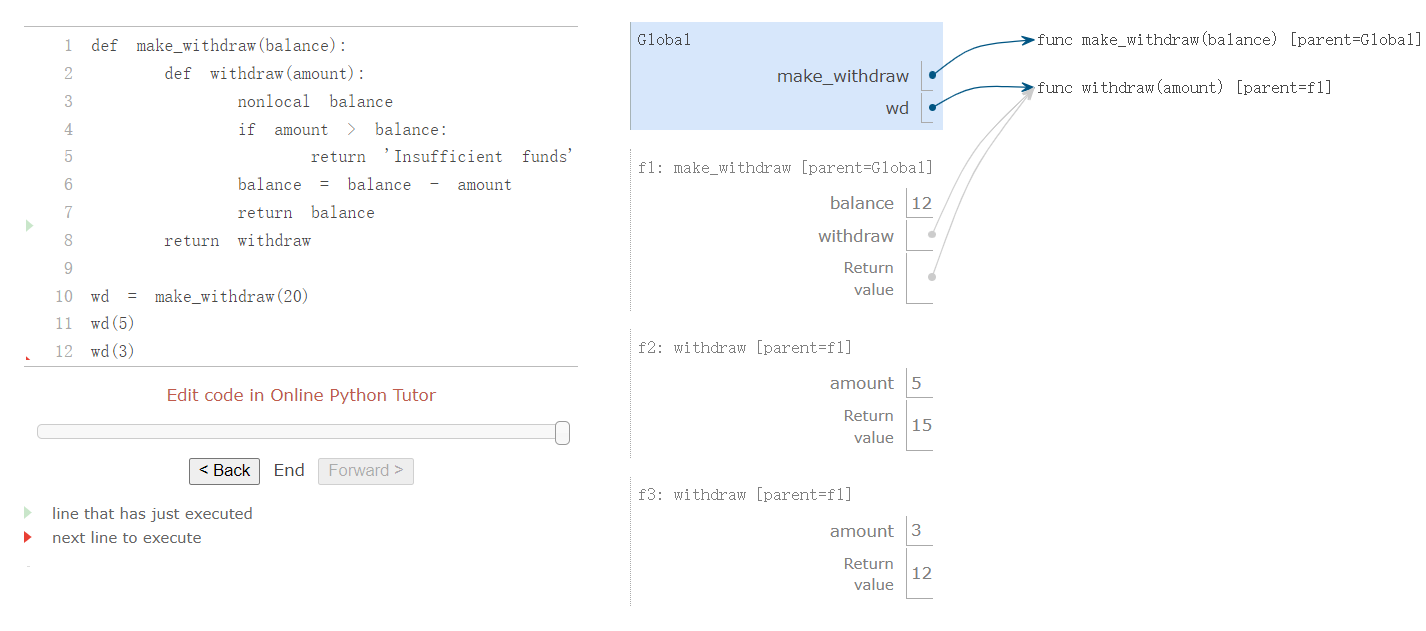

By introducing nonlocal statements, we have created a dual role for assignment statements. Either they change local bindings, or they change nonlocal bindings. In fact, assignment statements already had a dual role: they either created new bindings or re-bound existing names. Assignment can also change the contents of lists and dictionaries. The many roles of Python assignment can obscure the effects of executing an assignment statement. It is up to you as a programmer to document your code clearly so that the effects of assignment can be understood by others.



### 2.4.5 The Benefits of Non-Local Assignment
### 2.4.6 The Cost of Non-Local Assignment
### 2.4.7 Implementing Lists and Dictionaries

In [39]:
empty = 'empty'

def is_link(s):
    """s is linked list if it is empty or a (first, rest) pair."""
    return s == empty or (len(s) == 2 and is_link(s[1]))

def link(first, rest):
    """Construct a linked list from its first element and the rest."""
    assert is_link(rest), "rest must be a linked list."
    return [first, rest]

def first(s):
    """Return the first element of a linked list s."""
    assert is_link(s), "rest only applies to linked lists."
    assert s != empty, "empty linked list has no first element."
    return s[0]

def rest(s):
    """Return the rest of the elements of a linked list s."""
    assert is_link(s), "rest only applies to linked lists."
    assert s != empty, "empty linked list has no rest."
    return s[1]

def len_link(s):
    """Return the length of linked list s."""
    length = 0
    while s != empty:
        s, length = rest(s), length + 1
    return length

def getitem_link(s, i):
    """Return the element at index i of linked list s."""
    while i > 0:
        s, i =rest(s), i - 1
    return first(s)

def join_link(s, separator):
    """Return a string of all elements in s separated by separator."""
    if s == empty:
        return ""
    elif rest(s) == empty:
        return str(first(s))
    else:
        return str(first(s)) + separator + join_link(rest(s), separator)

In [41]:
def mutable_link():
    """Return a functional implementation of a mutable linked list."""
    contents = empty
    def dispatch(message, value=None):
        nonlocal contents
        if message == 'len':
            return len_link(contents)
        elif message == 'getitem':
            return getitem_link(contents, value)
        elif message == 'push_first':
            contents = link(value, contents)
        elif message == 'pop_first':
            f = first(contents)
            contents = rest(contents)
            return f
        elif message == 'str':
            return join_link(contents, ", ")
    return dispatch

 def to_mutable_link(source):
        """Return a functional list with the same contents as source."""
        s = mutable_link()
        for element in reversed(source):
            s('push_first', element)
        return s
        


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)